## Clustering Assignment


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the data and inspecting it
data=pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#checking the shape of the data
data.shape

(167, 10)

In [5]:
#checking info for verifying data types and missing values in any columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


No missing values in any columns

In [6]:
data.describe().round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


Looks like child_mort, income and gdpp have outliers, we'll explore then in the visualization part.

In [7]:
data['country'].nunique()

167

There are no duplicate records present

## Univariate analysis

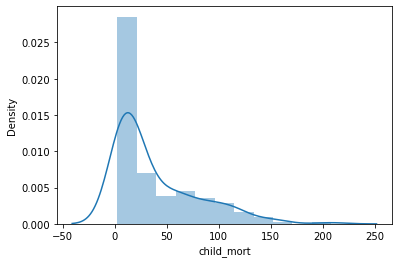

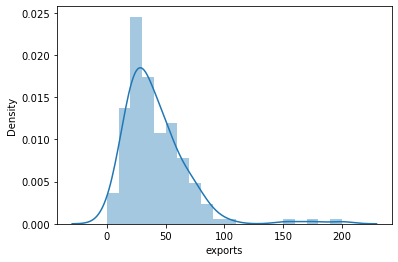

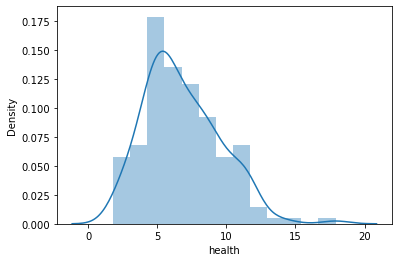

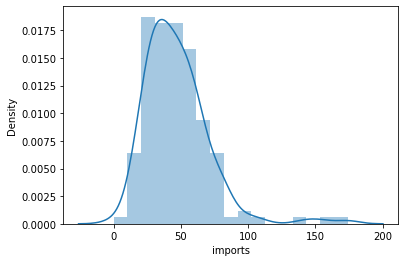

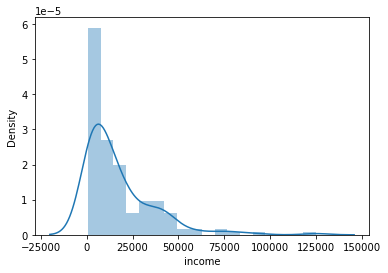

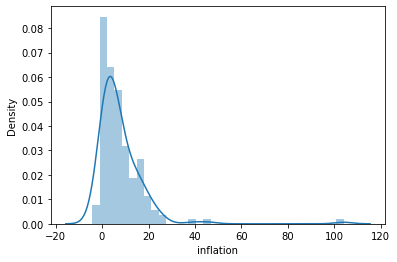

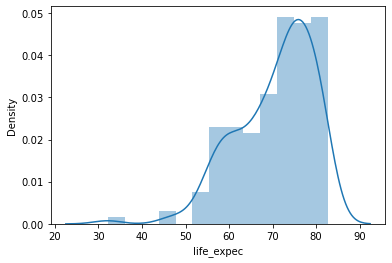

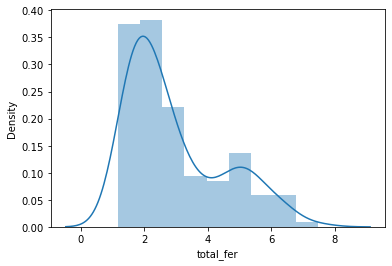

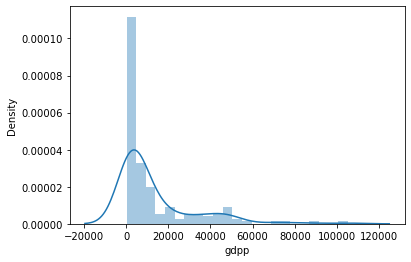

In [8]:
#visualizing the distribution of all numeric columns
for i in data.select_dtypes('number'):
    sns.distplot(data[i])
    plt.show()

## Insights
1. Some countries have very high child mortality rates. 
2. Some countries have very high export rate but most countries have nominal export rate.
3. Very few countries spend >12% on Healthcare
4. Very few countries have high gdpp,some have negative gdpp.



## Bi-variate Analysis

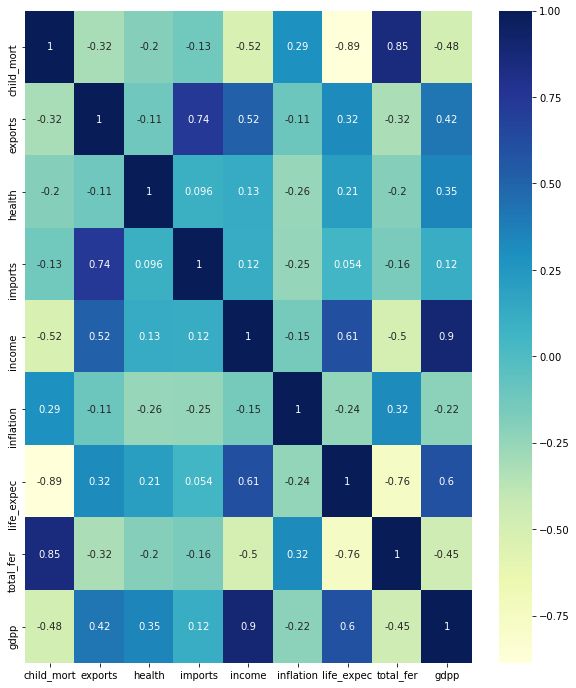

In [9]:
#heatmap of the numerical columns
plt.figure(figsize=[10,12])
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")
plt.show()

## Insights
1. `child_mortality` and `life_expectancy` has the highest negative co-relation as expected whereas `income` and `gdpp` have the highest postive one

2. `exports` has a fairly high positive co-relation with `imports`

3. `life_expectancy` has a fairly high negative co-relation with `total_fertility`

4. `total_fertility` and `child_mortality` has high positive co-relation possible reason could be these categories belong Low income /under-developed countries.

### Based on the observations we pick 'gdpp','income' and 'child_mort' as variables to perform clustering analysis

## Outlier Analysis

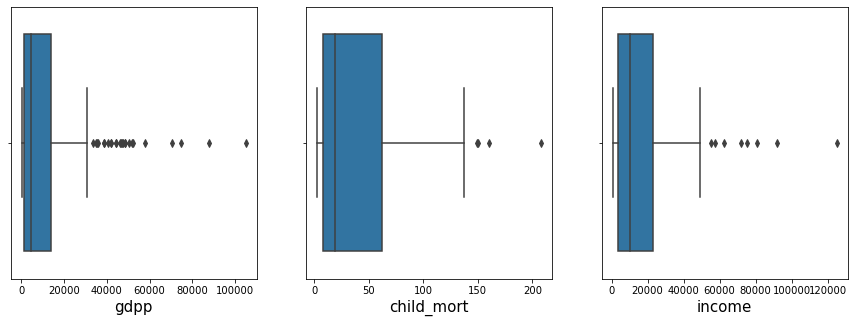

In [10]:
#plotting box plot to check for outliers 
cols = ['gdpp', 'child_mort', 'income']
plt.figure(figsize=(15, 5))
for i in cols:
    plt.subplot(1, 3, cols.index(i) + 1)
    sns.boxplot(data[i])
    plt.xlabel(i, fontsize = 15)
    
plt.show()

#### The 'gdpp'and 'income' columns have high number of outliers but based on the knowledge we have, we can conclude that such outliers are expected since the data has both under developed and developed countries in it. It is not necessary to handle them.


<AxesSubplot:xlabel='income', ylabel='child_mort'>

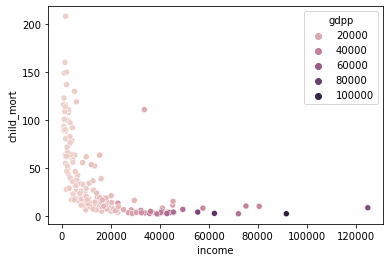

In [11]:
sns.scatterplot(x = data['income'], y = data['child_mort'], hue = data['gdpp'])

High income high gdp (high positive co-relation as seen above) 
Lower income higher child mortality

<AxesSubplot:xlabel='income', ylabel='child_mort'>

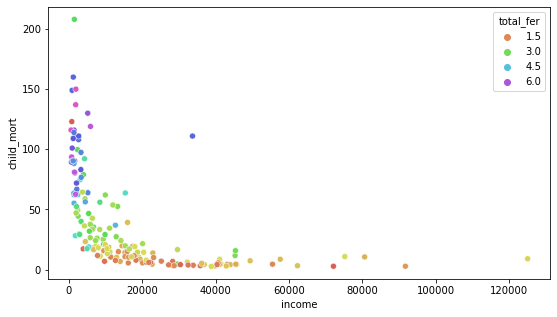

In [12]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x = data['income'], y = data['child_mort'], hue = data['total_fer'], palette='hls')

Lower income higher child mortality higher fertility

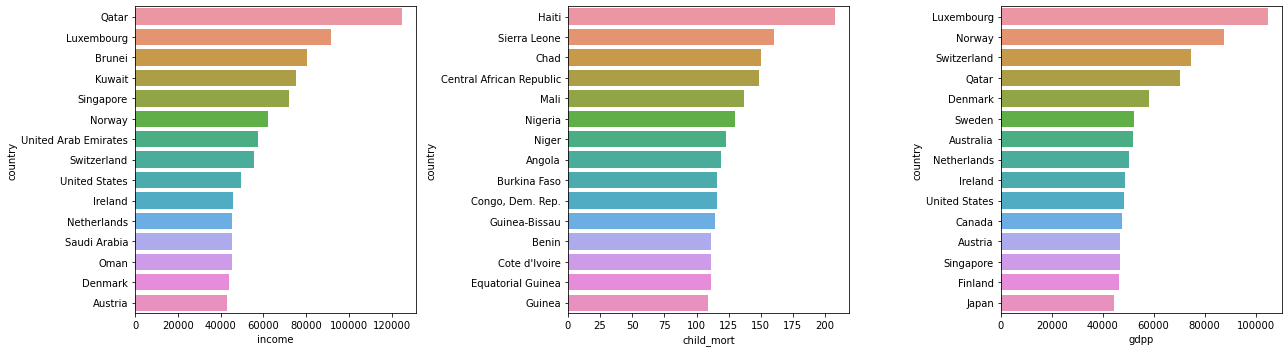

In [13]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)

temp = data[['country', 'income']].sort_values(by = 'income', ascending = False)[:15]
sns.barplot(x = 'income', y = 'country', data = temp)

plt.subplot(1, 3, 2)

temp = data[['country', 'child_mort']].sort_values(by = 'child_mort', ascending = False)[:15]
sns.barplot(x = 'child_mort', y = 'country', data = temp)

plt.subplot(1, 3, 3)

temp = data[['country', 'gdpp']].sort_values(by = 'gdpp', ascending = False)[:15]
sns.barplot(x = 'gdpp', y = 'country', data = temp)

plt.tight_layout()

<AxesSubplot:xlabel='country', ylabel='income'>

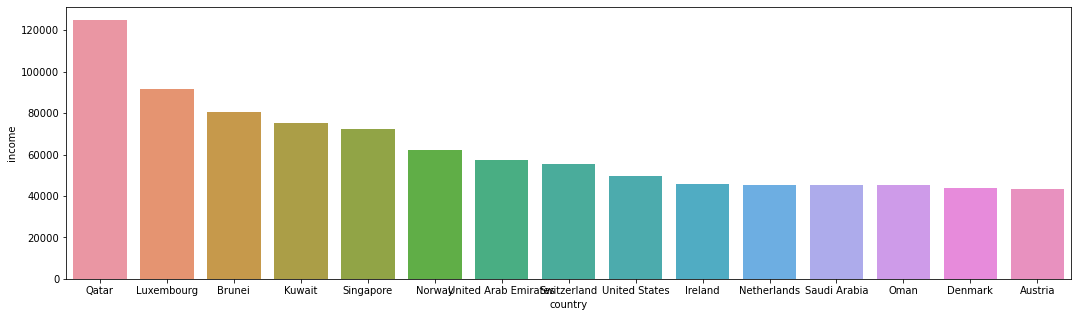

In [14]:
plt.figure(figsize=(18, 5))
temp = data[['country', 'income']].sort_values(by = 'income', ascending = False)[:15]
sns.barplot(x = 'country', y = 'income', data = temp)

## Standardizing the values 

In [15]:
#applying standard scaler and 
scl_cols = data.select_dtypes('number').columns

sc = StandardScaler()
#assigning scaled values to columns in the data
data_scl = sc.fit_transform(data[scl_cols])

In [16]:
#inspecting the scaled data
data_scl = pd.DataFrame(data_scl, columns = scl_cols)
data_scl.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Hopkin's Test for Clusterability

In [17]:
#defining the function for Hopkins Statistic
def hopkins(X):
    d = X.shape[1]
    n = X.shape[0]
    m = int(0.1 * n) 
    
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [18]:
# Checking the hopkins statistic value on the scaled features

print('Hopkins statistics is: ', hopkins(data_scl))

Hopkins statistics is:  0.866380072248746


#### Since Hopkins statistics is closer to 1, it indicates that the data is clusterable.
## Finding the Optimal Number of Clusters

### SSD

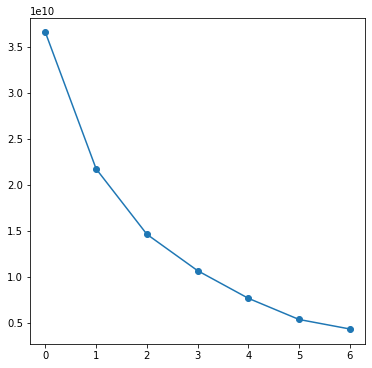

In [19]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data[scl_cols])
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize=[6,6])
plt.plot(ssd, marker = 'o')
plt.show()

In [20]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data[scl_cols])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data[scl_cols], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.7256314906273207
For n_clusters=3, the silhouette score is 0.7003508054481694
For n_clusters=4, the silhouette score is 0.6109297437247547
For n_clusters=5, the silhouette score is 0.572715818235237
For n_clusters=6, the silhouette score is 0.5901369078810058
For n_clusters=7, the silhouette score is 0.5944253756384579
For n_clusters=8, the silhouette score is 0.5964827694227414


SSD plotting does not provide an elbow clearly
Silhouette analysis has performed, which gave higher value for k = 2
From business stand-off, k of 2 does not add value so went with the second highest for k = 3


In [21]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=25)
kmeans.fit(data[scl_cols])

KMeans(max_iter=50, n_clusters=3, random_state=25)

In [22]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# assign the label
data_scl['cluster_id'] = kmeans.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


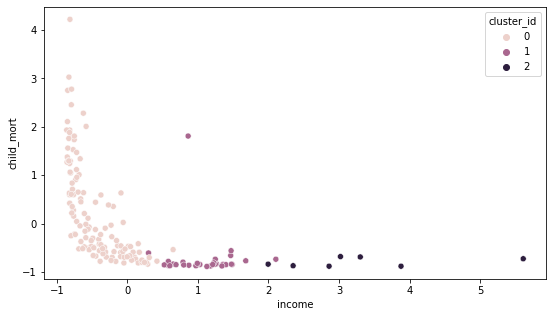

In [24]:
#scatter plot of clusters formed
plt.figure(figsize=(9, 5))

sns.scatterplot(x = data_scl['income'], y = data_scl['child_mort'], hue = data_scl['cluster_id'])
plt.show()

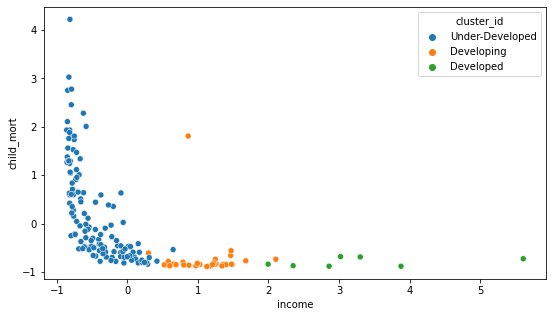

In [25]:
data_scl['cluster_id'] = data_scl['cluster_id'].replace(to_replace = [0, 1, 2], value = ['Under-Developed', 'Developing', 
                                                                                     'Developed'])

plt.figure(figsize=(9, 5))

sns.scatterplot(x = data_scl['income'], y = data_scl['child_mort'], hue = data_scl['cluster_id'])

plt.savefig('x.png', transparent = True)
plt.show()

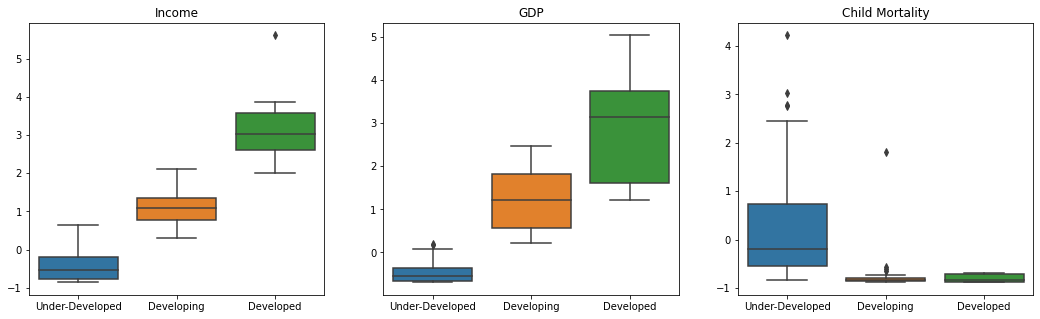

In [26]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)

sns.boxplot(x = 'cluster_id', y = 'income', data = data_scl)

plt.title('Income', fontsize = 12)
plt.ylabel(None)
plt.xlabel(None)

plt.subplot(1, 3, 2)

sns.boxplot(x = 'cluster_id', y = 'gdpp', data = data_scl)

plt.title('GDP', fontsize = 12)

plt.ylabel(None)
plt.xlabel(None)

plt.subplot(1, 3, 3)

sns.boxplot(x = 'cluster_id', y = 'child_mort', data = data_scl)

plt.title('Child Mortality', fontsize = 12)

plt.ylabel(None)
plt.xlabel(None)



plt.show()

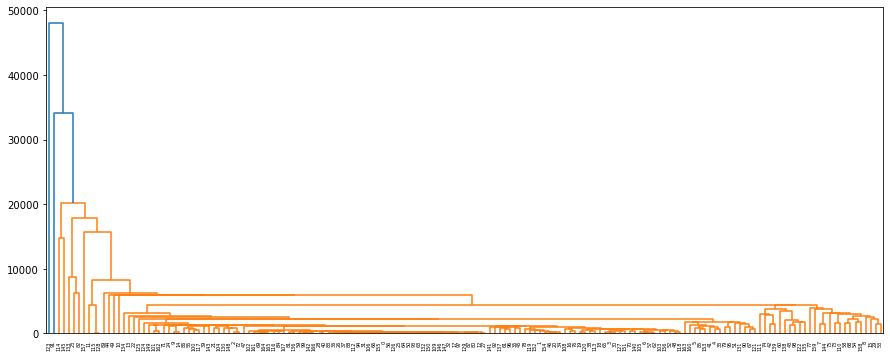

In [27]:
# single linkage
plt.figure(figsize=[15,6])
mergings = linkage(data[scl_cols], method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

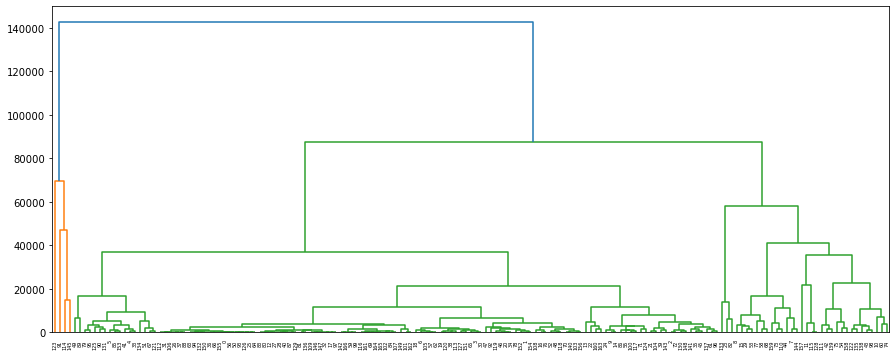

In [28]:
# complete linkage
plt.figure(figsize=[15,6])
mergings = linkage(data[scl_cols], method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [29]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [30]:
# assign cluster labels
data_scl['cluster_labels'] = cluster_labels
data_scl.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Under-Developed,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Under-Developed,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Under-Developed,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Under-Developed,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Under-Developed,0


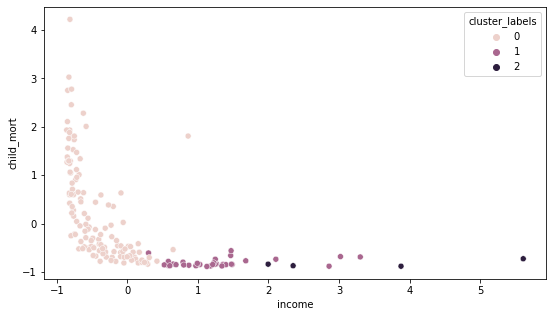

In [31]:
plt.figure(figsize=(9, 5))

sns.scatterplot(x = data_scl['income'], y = data_scl['child_mort'], hue = data_scl['cluster_labels'])
plt.show()

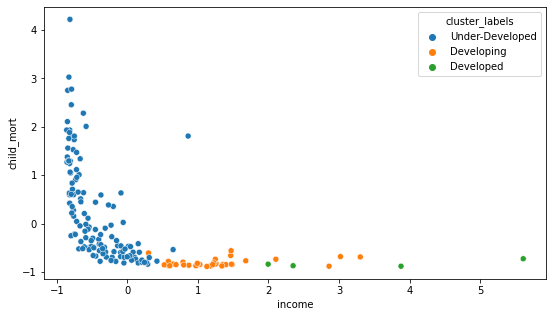

In [32]:
data_scl['cluster_labels'] = data_scl['cluster_labels'].replace(to_replace = [0, 1, 2], 
                                                        value = ['Under-Developed', 'Developing', 'Developed'])

plt.figure(figsize=(9, 5))

sns.scatterplot(x = data_scl['income'], y = data_scl['child_mort'], hue = data_scl['cluster_labels'])

plt.show()

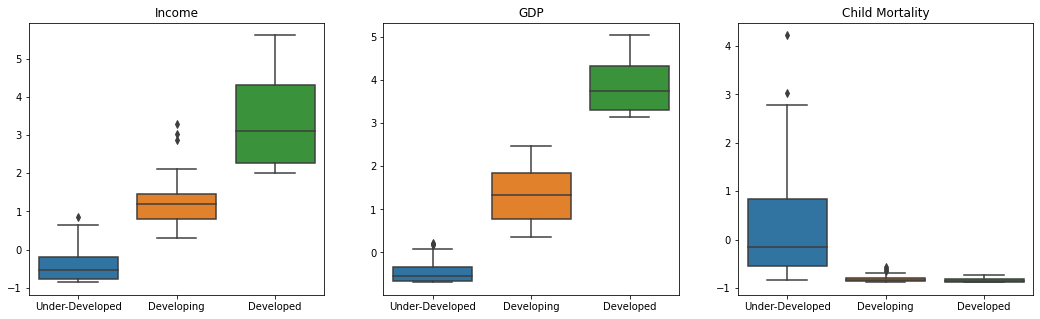

In [33]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)

sns.boxplot(x = 'cluster_labels', y = 'income', data = data_scl)

plt.title('Income', fontsize = 12)
plt.ylabel(None)
plt.xlabel(None)

plt.subplot(1, 3, 2)

sns.boxplot(x = 'cluster_labels', y = 'gdpp', data = data_scl)

plt.title('GDP', fontsize = 12)

plt.ylabel(None)
plt.xlabel(None)

plt.subplot(1, 3, 3)

sns.boxplot(x = 'cluster_labels', y = 'child_mort', data = data_scl)

plt.title('Child Mortality', fontsize = 12)

plt.ylabel(None)
plt.xlabel(None)


plt.show()

In [34]:
data_scl.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Under-Developed,Under-Developed
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Under-Developed,Under-Developed
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Under-Developed,Under-Developed
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Under-Developed,Under-Developed
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Under-Developed,Under-Developed


In [35]:
data[data_scl.columns] = data_scl

In [36]:
aid_country=data[data['cluster_id']=='Under-Developed']

In [37]:
aid_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Under-Developed,Under-Developed
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Under-Developed,Under-Developed
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Under-Developed,Under-Developed
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Under-Developed,Under-Developed
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Under-Developed,Under-Developed


In [38]:
aid_country.sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False],inplace=True)

In [39]:
aid_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801,Under-Developed,Under-Developed
88,Liberia,1.269149,-0.805310,1.820021,1.893764,-0.855591,-0.219360,-1.100286,1.372838,-0.691547,Under-Developed,Under-Developed
37,"Congo, Dem. Rep.",1.933196,-0.000328,0.399588,0.112267,-0.860326,1.235237,-1.472473,2.379922,-0.691164,Under-Developed,Under-Developed
112,Niger,2.107290,-0.691881,-0.604575,0.091552,-0.849660,-0.496426,-1.325854,3.009349,-0.690398,Under-Developed,Under-Developed
132,Sierra Leone,3.027505,-0.889467,2.294716,-0.513329,-0.828536,0.893648,-1.754433,1.492098,-0.687607,Under-Developed,Under-Developed


## Conclusion
Countries that are in dire need of aid are -
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone